### Contents
### 1.0 Import Libraries
### 2.0 Import data
### 3.0 Investigate Gender
### 4.0 Investigate Family Status
### 5.0 Investigate Age & Family Status
### 6.0 Investigate dependants
### 7.0 Investigate Loyalty
### 8.0 Investigate Income
### 9.0 Dependant Vis
### 10.0 Income v Time Vis
### 11.0 Top and Bottom Departments Vis
### 12.0 Investigate Frequency

## 1.0 Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy

## 2.0 Import data

In [2]:
# create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 4\instacart_basket_analysis"

In [3]:
#load complete dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_dataframe.pkl' ))

In [4]:
#load small sample
small = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small.pkl'))

In [5]:
#check them out
df.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,department,region,age_group,age_fam,income_range,dependants
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,2/17/2019,3,married,40423,beverages,South,young,Younger - married,Regular income,yes


In [6]:
df.shape

(30964564, 36)

In [7]:
small.shape

(9288468, 34)

In [8]:
small.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,department,region,age_group,age_fam
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
10,3108588,1,8,1,14,14.0,46149,5,0,Zero Calorie Cola,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
12,2550362,1,10,4,8,30.0,46149,2,1,Zero Calorie Cola,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
13,2968173,15,15,1,9,7.0,196,2,0,Soda,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Midwest,old,Older - divorced/widowed
19,2564002,15,3,6,12,7.0,14715,1,1,Coconut Water,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Midwest,old,Older - divorced/widowed
21,3317979,15,5,4,15,17.0,14715,1,1,Coconut Water,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Midwest,old,Older - divorced/widowed
22,2685110,15,7,1,11,17.0,14715,3,1,Coconut Water,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,beverages,Midwest,old,Older - divorced/widowed


## 3.0 Investigate Gender

In [9]:
df.groupby('age_group')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
middle,14524452.0,7.790319,4.239050,1.0,4.2,7.4,11.3,25.0
old,8194267.0,7.796715,4.246389,1.0,4.2,7.4,11.3,25.0
young,8240968.0,7.784978,4.237545,1.0,4.2,7.4,11.2,25.0


In [10]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group', 'age_fam', 'income_range', 'dependants'],
      dtype='object')

In [11]:
df.groupby('gender')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,15375408.0,7.788193,4.238225,1.0,4.2,7.4,11.2,25.0
Male,15584279.0,7.792956,4.242931,1.0,4.2,7.4,11.3,25.0


In [12]:
#make a crosstab for gender and days
gender_week = pd.crosstab(small['order_day_of_week'], small['gender'])

In [13]:
# define day names
day_names = {
    0: 'Sat',
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thu',
    6: 'Fri'
}

In [14]:
# rename the days
gender_week = gender_week.rename(index = day_names)

In [15]:
#take a look
gender_week

gender,Female,Male
order_day_of_week,,
Sat,875590,895969
Sun,809591,813472
Mon,601771,604728
Tue,547111,554358
Wed,540327,548125
Thu,601941,607647
Fri,637186,650652


<Axes: xlabel='order_day_of_week'>

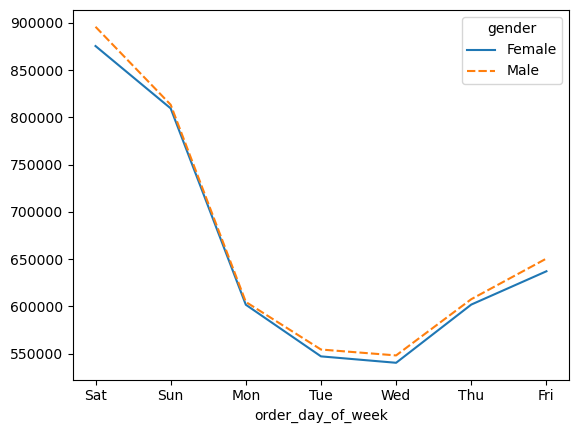

In [16]:
#make a quick and dirty plot
sns.lineplot(data = gender_week)

In [17]:
#make a crosstab for gender and hour of day
gender_hour = pd.crosstab(small['order_hour_of_day'], small['gender'])

In [18]:
#take a look
gender_hour

gender,Female,Male
order_hour_of_day,,
0,30962,31036
1,16742,16060
2,9851,9730
3,6992,7706
4,7366,7681
5,12620,12717
6,41015,43030
7,127801,131264
8,246948,249415


<Axes: xlabel='order_hour_of_day'>

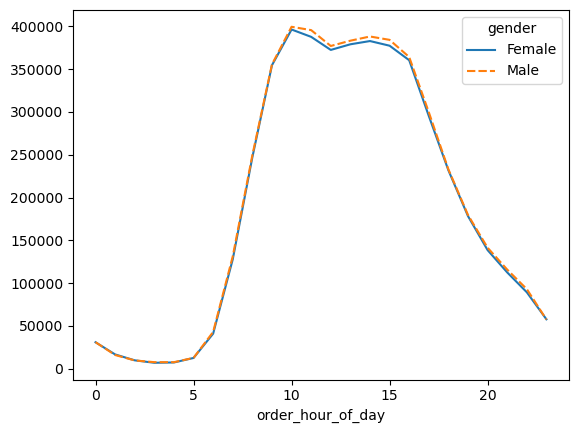

In [19]:
#make a quick and dirty chart
sns.lineplot(data = gender_hour)

In [20]:
#make a crosstab for gender and departments
depts_gender = pd.crosstab(df['department'], df['gender'])

In [21]:
#take a look
depts_gender

gender,Female,Male
department,,
alcohol,74844,69783
babies,200641,209751
bakery,559143,561685
beverages,1280384,1291517
breakfast,334473,336377
bulk,16742,16709
canned goods,498501,513573
dairy eggs,2574661,2602521
deli,499243,504591


In [22]:
# Calculate the total number of orders for each department for all genders
total_orders = depts_gender.sum(axis=1)

# Sort the departments based on the total number of orders in descending order
sorted_departments = total_orders.sort_values(ascending=False).index

# Reorder the crosstab based on the sorted departments
depts_gender = depts_gender.loc[sorted_departments]

In [23]:
depts_gender

gender,Female,Male
department,,
produce,4501275,4577998
dairy eggs,2574661,2602521
snacks,1377856,1388550
beverages,1280384,1291517
frozen,1052479,1069252
pantry,884109,898596
bakery,559143,561685
canned goods,498501,513573
deli,499243,504591


<Axes: xlabel='department'>

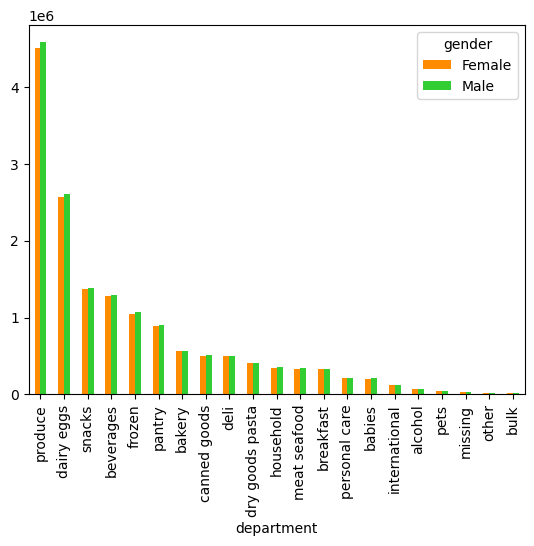

In [24]:
#quick and dirty chart
depts_gender.plot.bar(color = ['darkorange', 'limegreen'])

## 4.0 Investigate Family status

In [25]:
#create a family status week crosstab
fam_week = pd.crosstab(small['order_day_of_week'], small['fam_status'])

In [26]:
#rename days
fam_week = fam_week.rename(index = day_names)

In [27]:
#have a look
fam_week

fam_status,divorced/widowed,living with parents and siblings,married,single
order_day_of_week,,,,
Sat,150415,83963,1245215,291966
Sun,138158,77578,1135982,271345
Mon,103279,57558,848307,197355
Tue,94611,52156,773820,180882
Wed,92080,51984,764791,179597
Thu,104002,58373,847409,199804
Fri,110751,61776,908320,206991


<Axes: xlabel='order_day_of_week'>

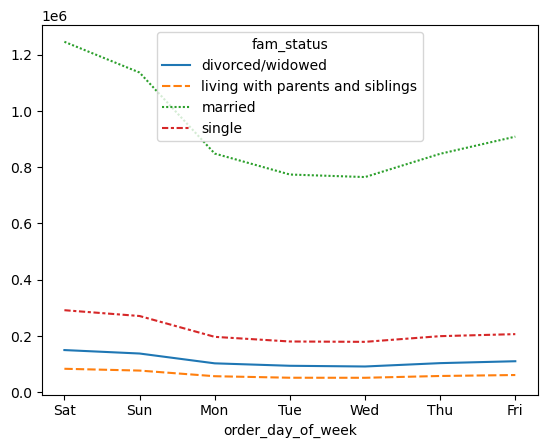

In [28]:
#quick and dirty chart
sns.lineplot(data= fam_week)

In [29]:
#create a crosstab for family status and hour of day
fam_hour = pd.crosstab(small['order_hour_of_day'], small['fam_status'])

<Axes: xlabel='order_hour_of_day'>

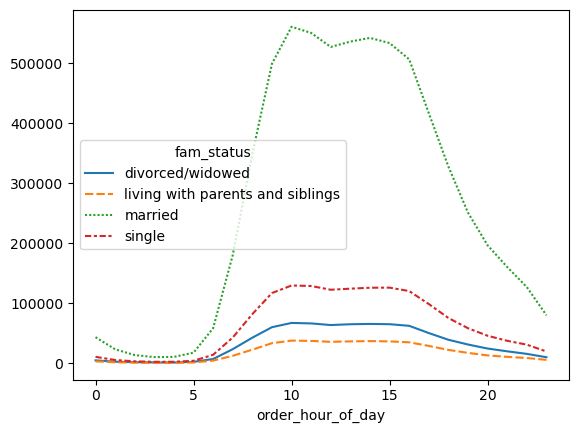

In [30]:
#quick and dirty chart
sns.lineplot(data = fam_hour)

In [31]:
#create a crosstab of age and family status
age_fam = pd.crosstab(df['fam_status'], df['age_group'])

In [32]:
age_fam

age_group,middle,old,young
fam_status,,,
divorced/widowed,623313,2021958,0
living with parents and siblings,0,0,1481172
married,10872560,6173586,4697565
single,3030852,0,2063558


<Axes: xlabel='fam_status'>

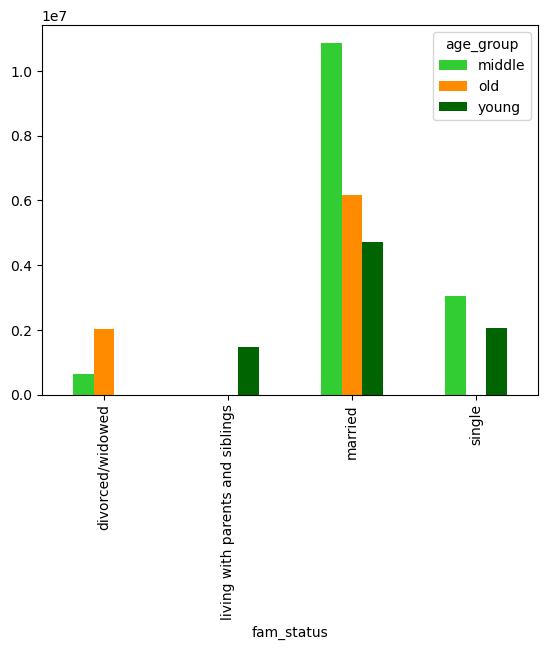

In [33]:
#quick and dirty chart
age_fam.plot.bar(color = ['limegreen', 'darkorange', 'darkgreen'])

In [34]:
age_fam.columns = ['Middle (35-65)', 'Older (>65)', 'Younger (<35)']

In [35]:
age_fam

,Middle (35-65),Older (>65),Younger (<35)
fam_status,,,
divorced/widowed,623313,2021958,0
living with parents and siblings,0,0,1481172
married,10872560,6173586,4697565
single,3030852,0,2063558


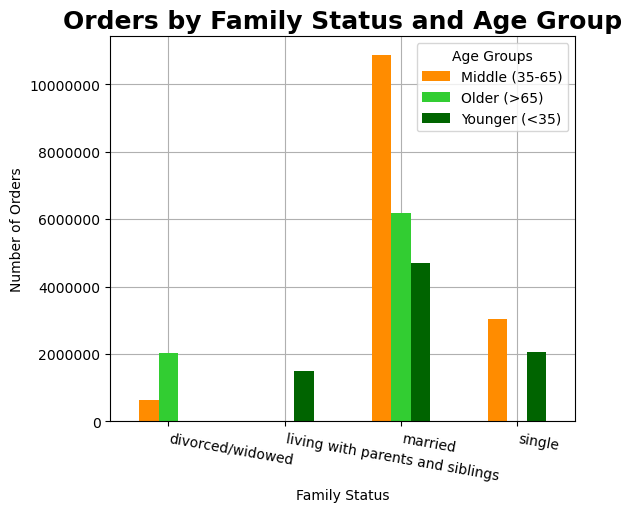

In [36]:
#create a nicer chart
#create a figure
age_fam_bar_fig, ax = plt.subplots(figsize = (6, 5))
#create a bar chart
age_fam_bar = age_fam.plot.bar(color = ['darkorange', 'limegreen', 'darkgreen'], ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#rotate x marks
plt.xticks(rotation = -10, ha = 'left')
#add labels and title
ax.set(xlabel = 'Family Status', ylabel = 'Number of Orders')
ax.set_title('Orders by Family Status and Age Group', fontsize = 18, fontweight = 'bold')
ax.legend(title = 'Age Groups', loc = 'upper right') 
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)

In [37]:
age_fam_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'age_fam_bar.png'), bbox_inches = 'tight')

In [38]:
#send the crosstab to excel
age_fam.to_clipboard()

## 5.0 Investigate Age & Family Status

### Check out the ordering habits of the 8 age_fam categories

In [39]:
#create a flag first for middle-married
df.loc[(df['age_group'] == 'middle') & (df['fam_status'] == 'married'), 'age_fam'] = 'Middle - married'

In [40]:
#then for Older-married
df.loc[(df['age_group'] == 'old') & (df['fam_status'] == 'married'), 'age_fam'] = 'Older - married'

In [41]:
#Then younger-married
df.loc[(df['age_group'] == 'young') & (df['fam_status'] == 'married'), 'age_fam'] = 'Younger - married'

In [42]:
#then middle-single
df.loc[(df['age_group'] == 'middle') & (df['fam_status'] == 'single'), 'age_fam'] = 'Middle - single'

In [43]:
#Then Younger-single
df.loc[(df['age_group'] == 'young') & (df['fam_status'] == 'single'), 'age_fam'] = 'Younger - single'

In [44]:
#then Older - divorced/widowed
df.loc[(df['age_group'] == 'old') & (df['fam_status'] == 'divorced/widowed'), 'age_fam'] = 'Older - divorced/widowed'

In [45]:
#then Younger - living with parents and siblings
df.loc[(df['age_group'] == 'young') & (df['fam_status'] == 'living with parents and siblings'), 'age_fam'] = 'Younger - living with parents & siblings'

In [46]:
#then middle-divorced/widowed
df.loc[(df['age_group'] == 'middle') & (df['fam_status'] == 'divorced/widowed'), 'age_fam'] = 'Middle - divorced/widowed'

In [47]:
#check the counts
df['age_fam'].value_counts(dropna = False)

age_fam
Middle - married                            10872560
Older - married                              6173586
Younger - married                            4697565
Middle - single                              3030852
Younger - single                             2063558
Older - divorced/widowed                     2021958
Younger - living with parents & siblings     1481172
Middle - divorced/widowed                     623313
Name: count, dtype: int64

In [48]:
#make a crosstab of day of week and age_fam
age_fam_week = pd.crosstab(df['order_day_of_week'], df['age_fam'])

In [49]:
age_fam_week = age_fam_week.rename(index = day_names)

In [50]:
age_fam_week

age_fam,Middle - divorced/widowed,Middle - married,Middle - single,Older - divorced/widowed,Older - married,Younger - living with parents & siblings,Younger - married,Younger - single
order_day_of_week,,,,,,,,
Sat,116567,2067086,583268,385939,1180305,280828,903313,391304
Sun,110849,1898433,527729,348349,1069146,259482,822275,375423
Mon,81615,1420111,393254,262224,802946,192366,606702,265488
Tue,71982,1288836,359062,243338,735012,174418,554227,242660
Wed,71777,1274268,354070,234927,721234,173214,551019,244485
Thu,85444,1406585,401628,262990,803125,195460,614385,264112
Fri,85079,1517241,411841,284191,861818,205404,645644,280086


<Axes: xlabel='order_day_of_week'>

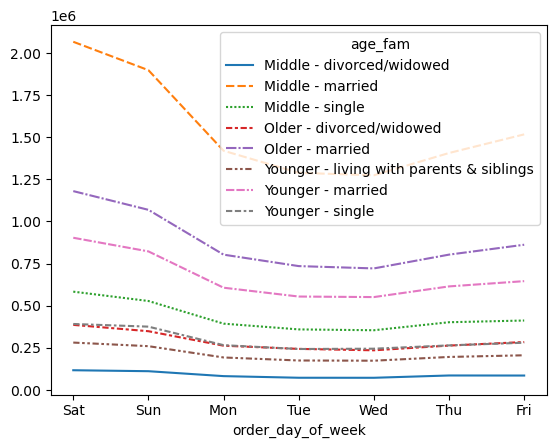

In [51]:
#quick and dirty line
sns.lineplot(data = age_fam_week)

In [52]:
#create a crosstab of age_fam and hour of day
age_fam_hour = pd.crosstab(df['order_hour_of_day'], df['age_fam'])

<Axes: xlabel='order_hour_of_day'>

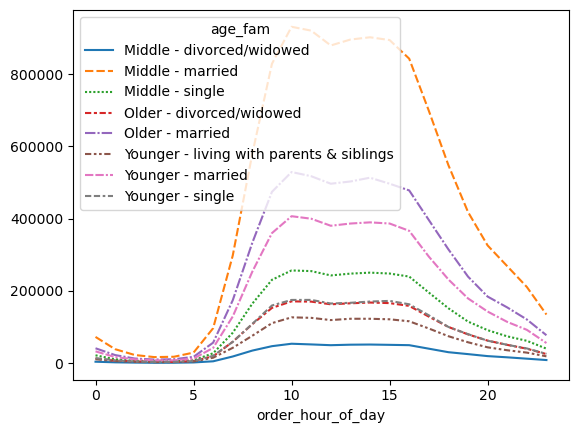

In [53]:
#quick and dirty line
sns.lineplot(data = age_fam_hour)

In [60]:
# create a crosstab of age_fam and loyalty_flag 
age_fam_loyalty = pd.crosstab(df['age_fam'], df['loyalty_flag'])

<Axes: xlabel='age_fam'>

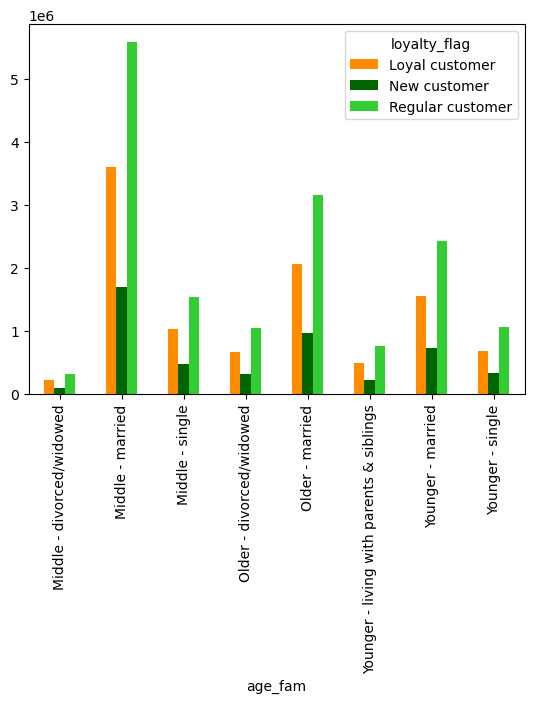

In [61]:
#quick and dirty barplot
age_fam_loyalty.plot.bar(color = ['darkorange', 'darkgreen', 'limegreen'])

In [60]:
# create a crosstab of age_fam and loyalty_flag 
age_fam_loyalty = pd.crosstab(df['age_fam'], df['loyalty_flag'])

<Axes: xlabel='age_fam'>

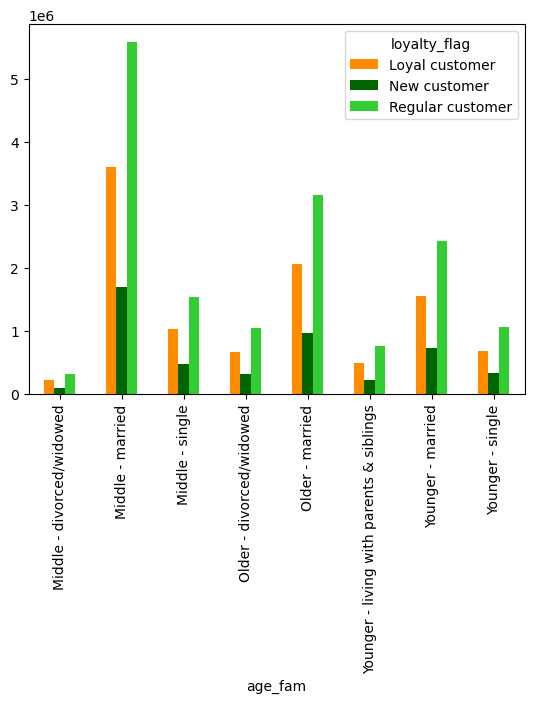

In [61]:
#quick and dirty barplot
age_fam_loyalty.plot.bar(color = ['darkorange', 'darkgreen', 'limegreen'])


### Nothing too interesting to report

## 6.0 Investigate Dependants

In [54]:
#create a crosstab of n_dependents and fam_status
fam_dependants = pd.crosstab(df['fam_status'], df['n_dependants']).sort_index(axis=0, ascending=False)

<Axes: xlabel='fam_status'>

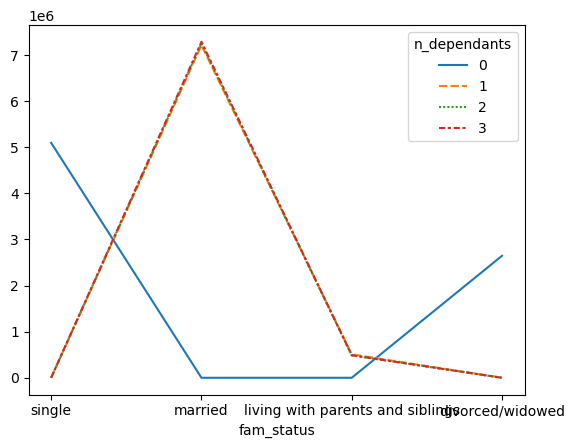

In [55]:
#quick and dirty line
sns.lineplot(data = fam_dependants)

In [56]:
fam_dependants

n_dependants,0,1,2,3
fam_status,,,,
single,5094410,0,0,0
married,0,7211061,7248603,7284047
living with parents and siblings,0,508045,484658,488469
divorced/widowed,2645271,0,0,0


<Axes: xlabel='fam_status'>

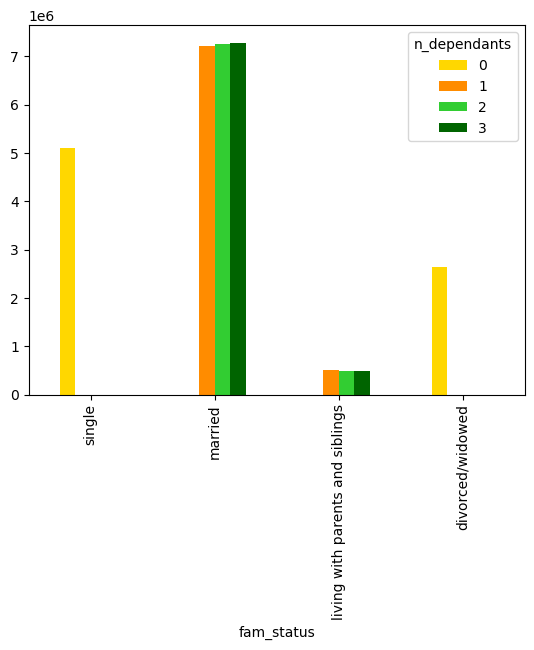

In [57]:
#quick and dirty barplot
fam_dependants.plot.bar(color = ['gold', 'darkorange', 'limegreen', 'darkgreen'])

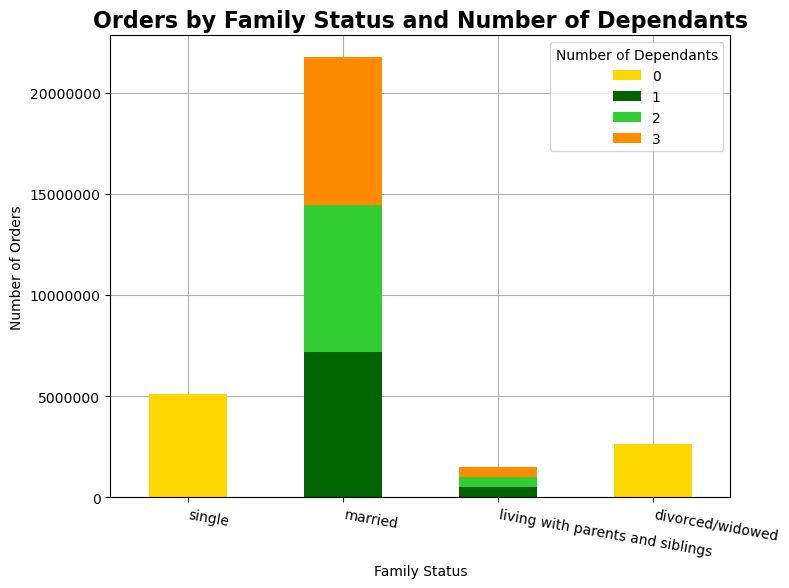

In [58]:
#create a nicer chart
#create a figure
fam_dependants_bar_fig, ax = plt.subplots(figsize = (8, 6))
#create a bar chart
fam_dependants_bar = fam_dependants.plot.bar(stacked = True, color = ['gold', 'darkgreen', 'limegreen', 'darkorange'], ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#rotate x marks
plt.xticks(rotation = -10, ha = 'left')
#add labels and title
ax.set(xlabel = 'Family Status', ylabel = 'Number of Orders')
ax.set_title('Orders by Family Status and Number of Dependants', fontsize = 16, fontweight = 'bold')
ax.legend(title = 'Number of Dependants', loc = 'upper right') 
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)

In [59]:
#save the viz
fam_dependants_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'fam_dependants.png'))

In [60]:
# create a crosstab of age_fam and loyalty_flag 
age_fam_loyalty = pd.crosstab(df['age_fam'], df['loyalty_flag'])

<Axes: xlabel='age_fam'>

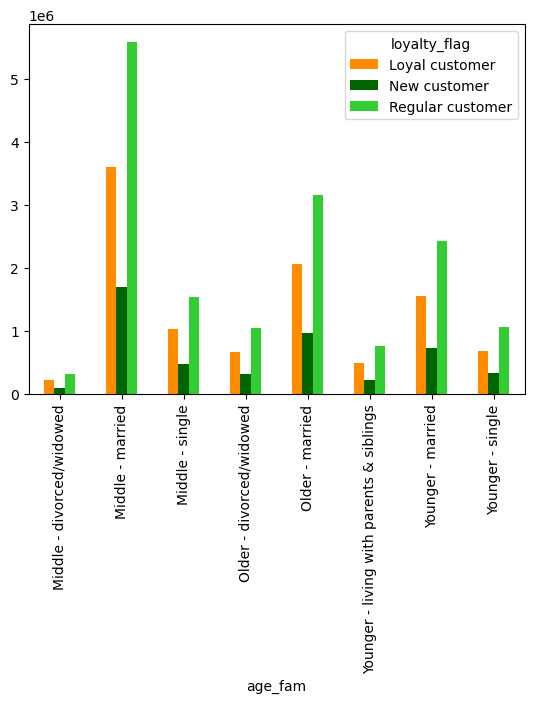

In [61]:
#quick and dirty barplot
age_fam_loyalty.plot.bar(color = ['darkorange', 'darkgreen', 'limegreen'])

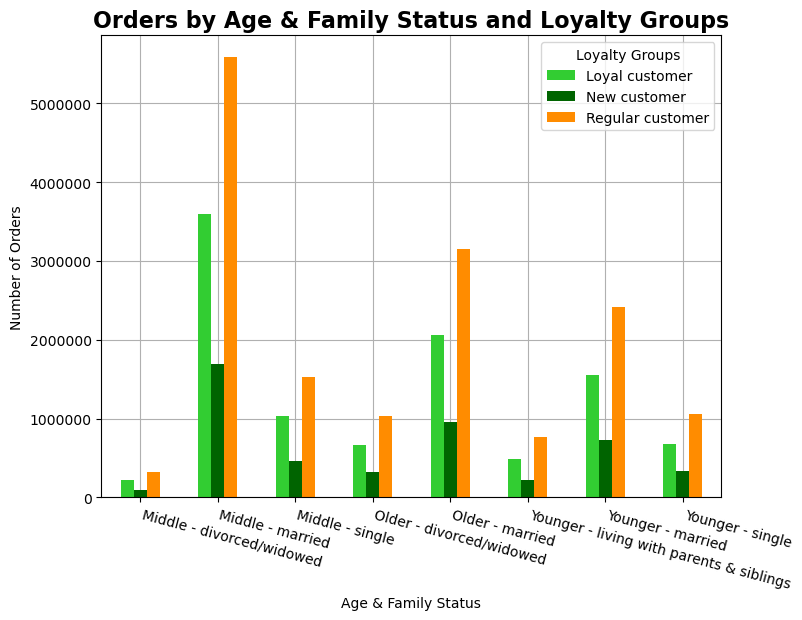

In [62]:
#create a nicer chart
#create a figure
age_fam_loyalty_bar_fig, ax = plt.subplots(figsize = (8, 6))
#create a bar chart
age_fam_loyalty_bar = age_fam_loyalty.plot.bar(color = ['limegreen', 'darkgreen', 'darkorange'], ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#rotate x marks
plt.xticks(rotation = -15, ha = 'left')
#add labels and title
ax.set(xlabel = 'Age & Family Status', ylabel = 'Number of Orders')
ax.set_title('Orders by Age & Family Status and Loyalty Groups', fontsize = 16, fontweight = 'bold')
ax.legend(title = 'Loyalty Groups', loc = 'upper right') 
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)

In [63]:
age_fam_loyalty_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'age_fam_loyalty_bar.png'), bbox_inches = 'tight')

In [64]:
#export dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_dataframe.pkl'))

## 7.0 Investigate loyalty

In [65]:
#create a crosstab of loyalty and price category
loyalty_price = pd.crosstab(df['price_range_loc'], df['loyalty_flag'])

In [66]:
#take a look
loyalty_price

loyalty_flag,Loyal customer,New customer,Regular customer
price_range_loc,,,
High-range product,119936,65927,212090
Low-range product,3214690,1501288,4958862
Mid-range product,6949467,3236480,10705824


<Axes: xlabel='price_range_loc'>

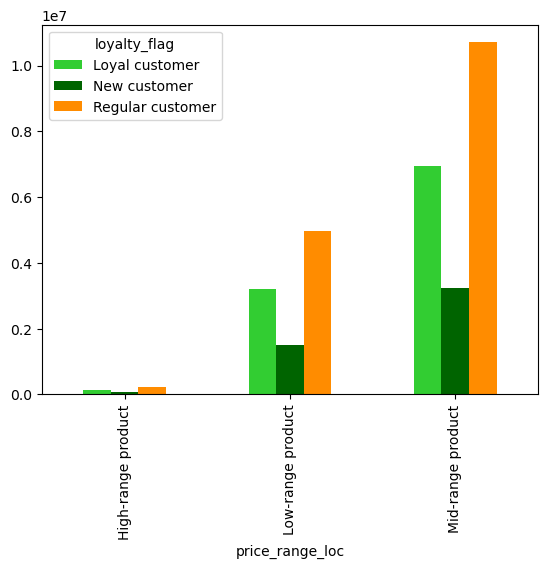

In [67]:
#quick and dirty bar
loyalty_price.plot.bar(color = ['limegreen', 'darkgreen', 'darkorange'])

In [68]:
#reminder of the columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group', 'age_fam', 'income_range', 'dependants'],
      dtype='object')

## 8.0 Investigate Income

In [69]:
#take a look at the income stats by age_group
df.groupby('age_group')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
middle,14526725.0,107044.865441,43827.759634,25903.0,75626.0,106280.0,136506.0,592409.0
old,8195544.0,115870.266216,42153.285690,29001.0,95563.0,116161.0,143269.0,593901.0
young,8242295.0,70585.742974,25243.170557,25911.0,56048.0,69090.0,84678.0,396364.0


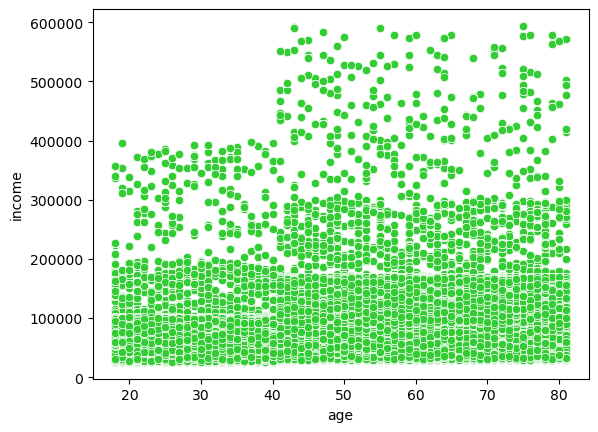

In [70]:
# create a scatterplot of the relationship between age and income
age_income_scatter = sns.scatterplot(x = 'age', y = 'income', data = df, color = 'limegreen')

Text(0.5, 1.0, 'Income by Age')

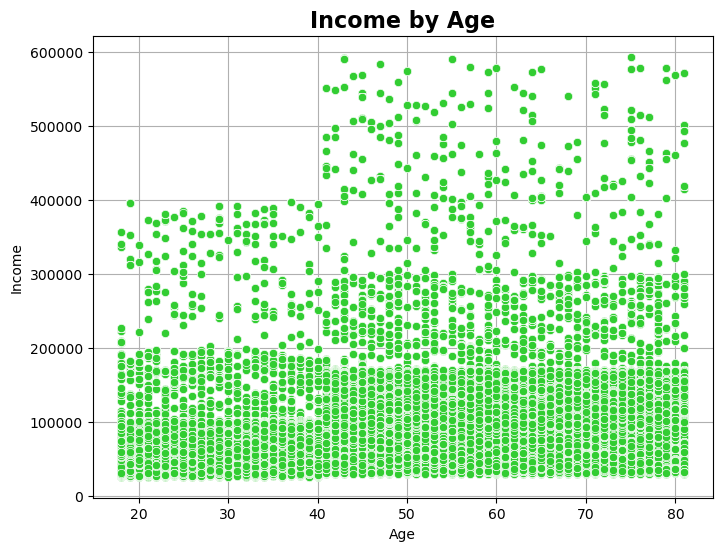

In [71]:
#create a nicer chart
#create a figure
age_income_scat_fig, ax = plt.subplots(figsize = (8, 6))
#create a bar chart
age_income_scat_bar = sns.scatterplot(x = 'age', y = 'income', data = df, color = 'limegreen', ax = ax)
#with a grid
plt.grid()
ax.set_axisbelow(True)
#add labels and title
ax.set(xlabel = 'Age', ylabel = 'Income')
ax.set_title('Income by Age', fontsize = 16, fontweight = 'bold')


In [72]:
age_income_scat_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'age_income_scat.png'))

## Create an income range flag

In [73]:
#starting with high
df.loc[df['income'] > 200000, 'income_range'] = 'Very High income'

In [74]:
# then mid
df.loc[(df['income'] >=100000) & (df['income'] <= 200000), 'income_range'] = 'High income'

In [75]:
#then under 200k
df.loc[df['income'] < 100000, 'income_range'] = 'Regular income'

In [76]:
#check it out
income_ranges = df['income_range'].value_counts(dropna = False)

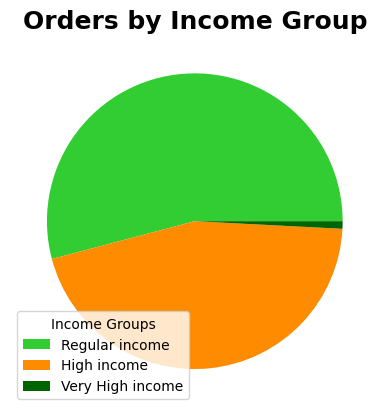

In [77]:
#create a pie of income groups
income_pie = plt.pie(income_ranges, colors = ['limegreen', 'darkorange', 'darkgreen'])
#set title and lables
plt.title('Orders by Income Group', fontsize = 18, fontweight = 'bold' )
plt.legend(income_ranges.index, title = 'Income Groups', loc = 'best')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'income_pie.png'), transparent = True)

In [78]:
#check out some stats in excel
df.groupby('income_range')['prices'].describe().to_clipboard()

In [79]:
# age stats
df.groupby('age_group')['prices'].describe().to_clipboard()

In [80]:
#check out age_fam frequency
df.groupby('age_fam')['days_since_prior_order'].describe()

,count,mean,std,min,25%,50%,75%,max
age_fam,,,,,,,,
Middle - divorced/widowed,590544.0,10.691400,8.603386,0.0,5.0,7.0,14.0,30.0
Middle - married,10289156.0,10.835578,8.589151,0.0,5.0,7.0,14.0,30.0
Middle - single,2868812.0,10.757606,8.562723,0.0,5.0,7.0,14.0,30.0
Older - divorced/widowed,1913570.0,10.768514,8.579648,0.0,5.0,7.0,14.0,30.0
Older - married,5840990.0,10.799413,8.575949,0.0,5.0,7.0,14.0,30.0
Younger - living with parents & siblings,1402652.0,10.750995,8.559568,0.0,5.0,7.0,14.0,30.0
Younger - married,4445596.0,10.815045,8.563423,0.0,5.0,7.0,14.0,30.0
Younger - single,1951961.0,10.895824,8.592332,0.0,5.0,8.0,14.0,30.0


## 0.9 Dependant Viz

## Create a dependant flag


In [81]:
#create yes
df.loc[df['n_dependants'] >= 1, 'dependants'] = 'yes'

In [82]:
#create no
df.loc[df['n_dependants'] == 0, 'dependants'] = 'no'

In [83]:
#check it out
dependants = df['dependants'].value_counts(dropna = False)

In [84]:
dependants


dependants
yes    23224883
no      7739681
Name: count, dtype: int64

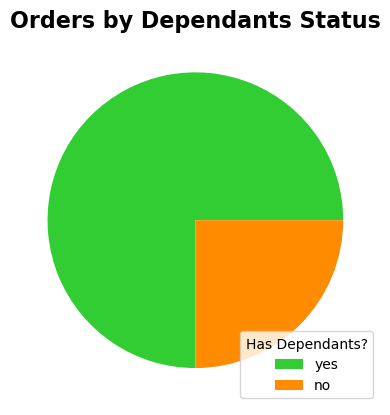

In [85]:
#create a pie of Dependants
dependants_pie = plt.pie(dependants, colors = ['limegreen', 'darkorange'])
#set title and lables
plt.title('Orders by Dependants Status', fontsize = 16, fontweight = 'bold' )
plt.legend(dependants.index, title = 'Has Dependants?', loc = 'best')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'dependants_pie.png'), transparent = True)

In [86]:
#check out ages and types of products
age_price_range = pd.crosstab(df['price_range_loc'], df['age_group'])

In [87]:
#check it out
age_price_range

age_group,middle,old,young
price_range_loc,,,
High-range product,185440,106915,105598
Low-range product,4539130,2559099,2576611
Mid-range product,9802155,5529530,5560086


<Axes: xlabel='price_range_loc'>

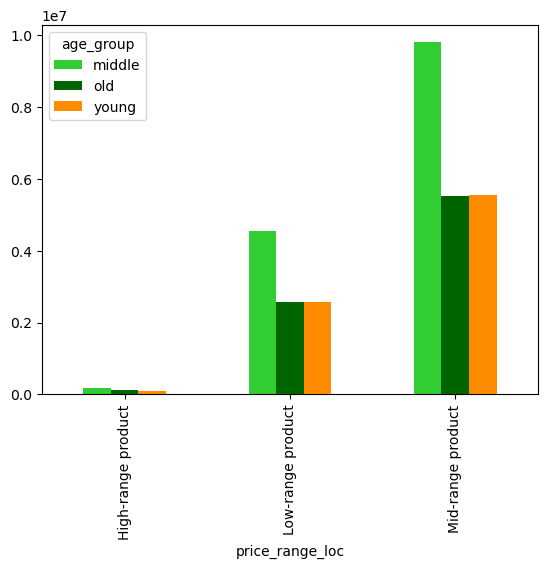

In [88]:
#quick and dirty chart
age_price_range.plot.bar(color = ['limegreen', 'darkgreen', 'darkorange'])


In [89]:
#check out dependants by week
dependants_week = pd.crosstab(df['order_day_of_week'], df['dependants'])

<Axes: xlabel='order_day_of_week'>

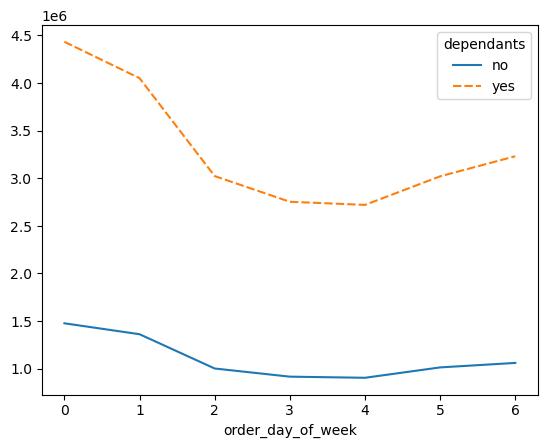

In [90]:
#quick and dirty chart
sns.lineplot(data = dependants_week)

In [91]:
#check out dependants by hour
dependants_hour = pd.crosstab(df['order_hour_of_day'], df['dependants'])

<Axes: xlabel='order_hour_of_day'>

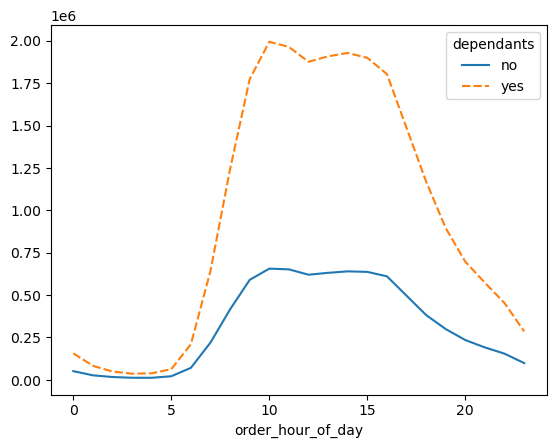

In [92]:
#quick and dirty chart
sns.lineplot(data = dependants_hour)

In [93]:
#rename the days
dependants_week = dependants_week.rename(index = day_names)

In [94]:
# check it out
dependants_week

dependants,no,yes
order_day_of_week,,
Sat,1477078,4431532
Sun,1362350,4049336
Mon,1002581,3022125
Tue,917042,2752493
Wed,905259,2719735
Thu,1014174,3019555
Fri,1061197,3230107


In [95]:
#send it to excel
dependants_week.to_clipboard()

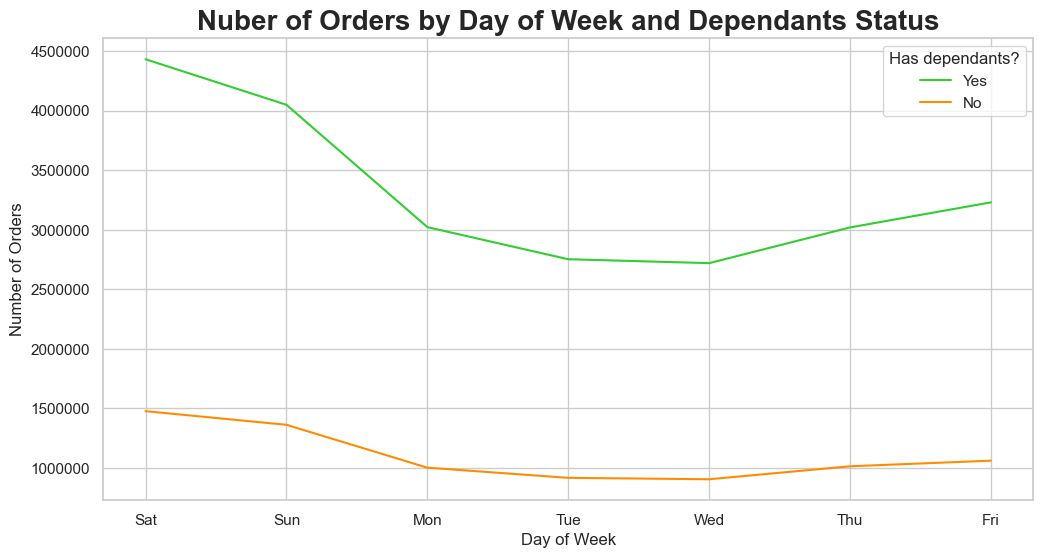

In [96]:
# create a nicer week chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = dependants_week, x = 'order_day_of_week', y = 'yes', label='Yes', color = 'limegreen')
sns.lineplot(data = dependants_week, x='order_day_of_week', y='no', label = 'No', color = 'darkorange')
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Nuber of Orders by Day of Week and Dependants Status', fontsize = 20, fontweight = 'bold')
plt.legend(title = 'Has dependants?')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'dependants_week_line.png'))

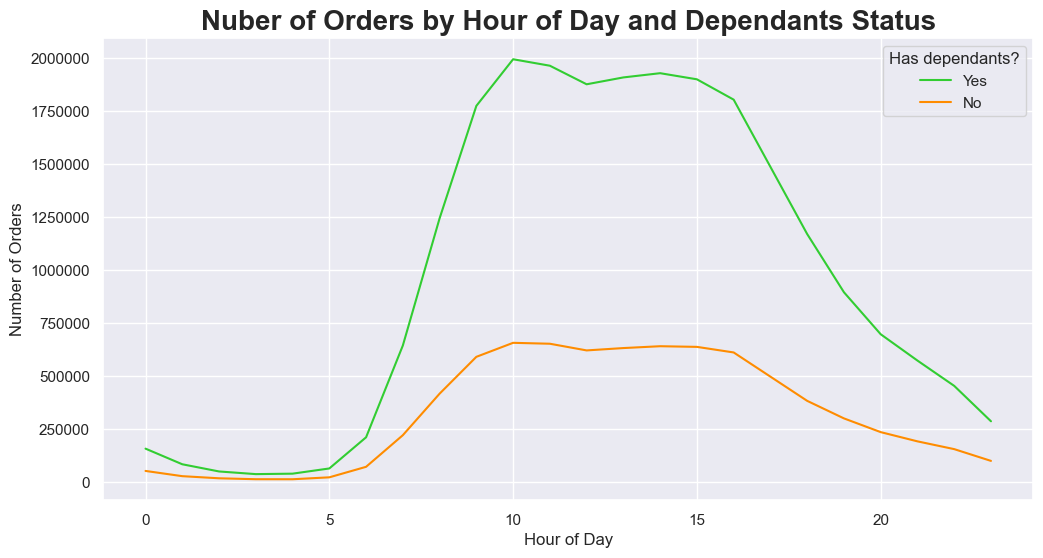

In [97]:
# create a nicer hour chart
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = dependants_hour, x = 'order_hour_of_day', y = 'yes', label='Yes', color = 'limegreen')
sns.lineplot(data = dependants_hour, x='order_hour_of_day', y='no', label = 'No', color = 'darkorange')
# set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Nuber of Orders by Hour of Day and Dependants Status', fontsize = 20, fontweight = 'bold')
plt.legend(title = 'Has dependants?')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'dependants_hour_line.png'))

In [98]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group', 'age_fam', 'income_range', 'dependants'],
      dtype='object')

In [99]:
df.groupby('age_group')['add_to_cart_order'].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
middle,14526725.0,8.369064,7.162119,1.0,3.0,6.0,11.0,145.0
old,8195544.0,8.307779,7.036732,1.0,3.0,6.0,11.0,99.0
young,8242295.0,8.407365,7.185120,1.0,3.0,6.0,12.0,109.0


In [100]:
# create a crosstab for dependants and price_range
dependants_price_range = pd.crosstab(df['price_range_loc'], df['dependants']).sort_values(by='yes', ascending = False)

In [101]:
#have a look
dependants_price_range

dependants,no,yes
price_range_loc,,
Mid-range product,5222988,15668783
Low-range product,2419238,7255602
High-range product,97455,300498


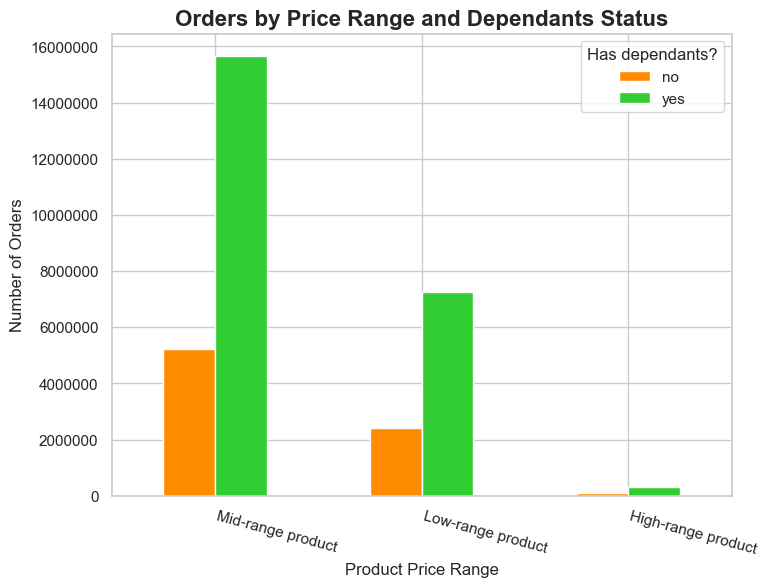

In [102]:
#create a chart
#create a figure
sns.set(style = 'whitegrid')
dependants_price_range_bar_fig, ax = plt.subplots(figsize = (8, 6),)
#create a bar chart
dependants_price_range_bar = dependants_price_range.plot.bar(color = ['darkorange', 'limegreen'], ax = ax)
#rotate x marks
plt.xticks(rotation = -15, ha = 'left')
#add labels and title
ax.set(xlabel = 'Product Price Range', ylabel = 'Number of Orders')
ax.set_title('Orders by Price Range and Dependants Status', fontsize = 16, fontweight = 'bold')
ax.legend(title = 'Has dependants?', loc = 'upper right') 
ax.yaxis.get_major_formatter().set_scientific(False)

In [103]:
#save it
dependants_price_range_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'dependants_price_bar.png'), bbox_inches = 'tight')

In [104]:
#take a look in excel
dependants_price_range.to_clipboard()

In [105]:
#take a look at dependants and departments
dependants_depts = pd.crosstab(df['department'], df['dependants']).sort_values(by = 'yes', ascending = False)

In [106]:
dependants_depts.to_clipboard()

<Axes: xlabel='department'>

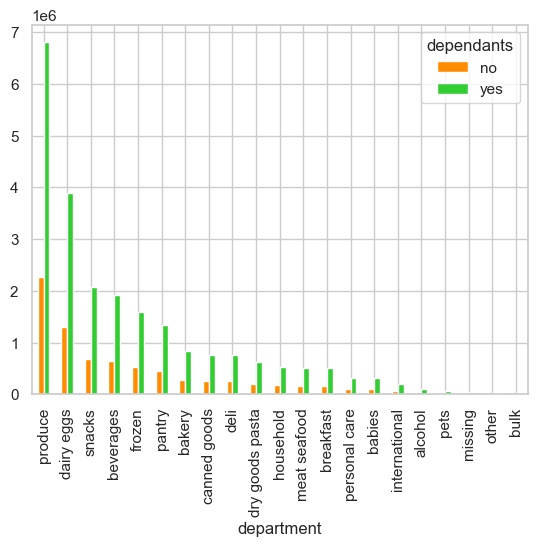

In [107]:
#quick and dirty bar
dependants_depts.plot.bar(color = ['darkorange', 'limegreen'])

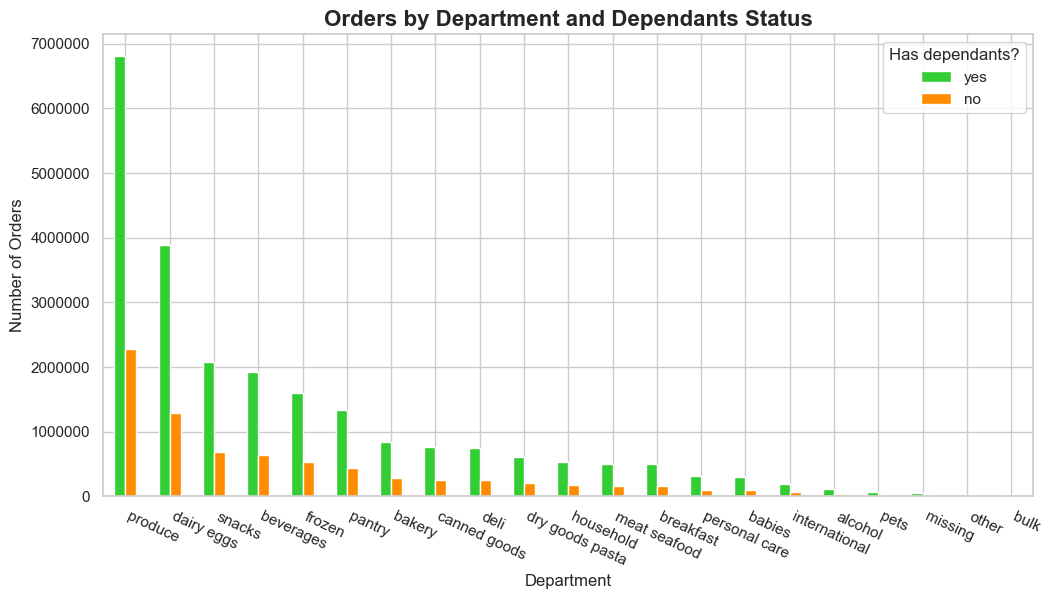

In [108]:
#create a chart
#create a figure
sns.set(style = 'whitegrid')
dependants_depts_bar_fig, ax = plt.subplots(figsize = (12, 6),)
#create a bar chart
dependants_depts_bar = dependants_depts[['yes', 'no']].plot.bar(color = ['limegreen', 'darkorange'], ax = ax)
#rotate x marks
plt.xticks(rotation = -25, ha = 'left')
#add labels and title
ax.set(xlabel = 'Department', ylabel = 'Number of Orders')
ax.set_title('Orders by Department and Dependants Status', fontsize = 16, fontweight = 'bold')
ax.legend(title = 'Has dependants?', loc = 'upper right') 
ax.yaxis.get_major_formatter().set_scientific(False)

In [109]:
#save it
dependants_depts_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'dependants_depts_bar.png'), bbox_inches = 'tight')

### 10.0 Income v Time viz

In [110]:
#crosstab of income range and day
income_week = pd.crosstab(df['order_day_of_week'], df['income_range'])

In [111]:
#rename the days
income_week = income_week.rename(index = day_names)

<Axes: xlabel='order_day_of_week', ylabel='Regular income'>

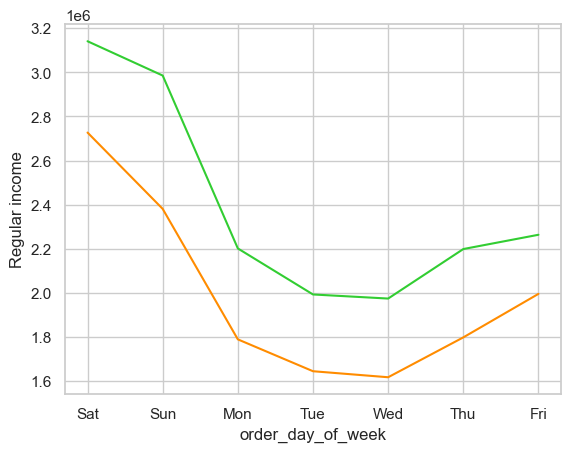

In [112]:
#quick and dirty line
sns.lineplot(data = income_week, x = income_week.index, y = 'Regular income', color = 'limegreen')
sns.lineplot(data = income_week, x = income_week.index, y = 'High income', color = 'darkorange')

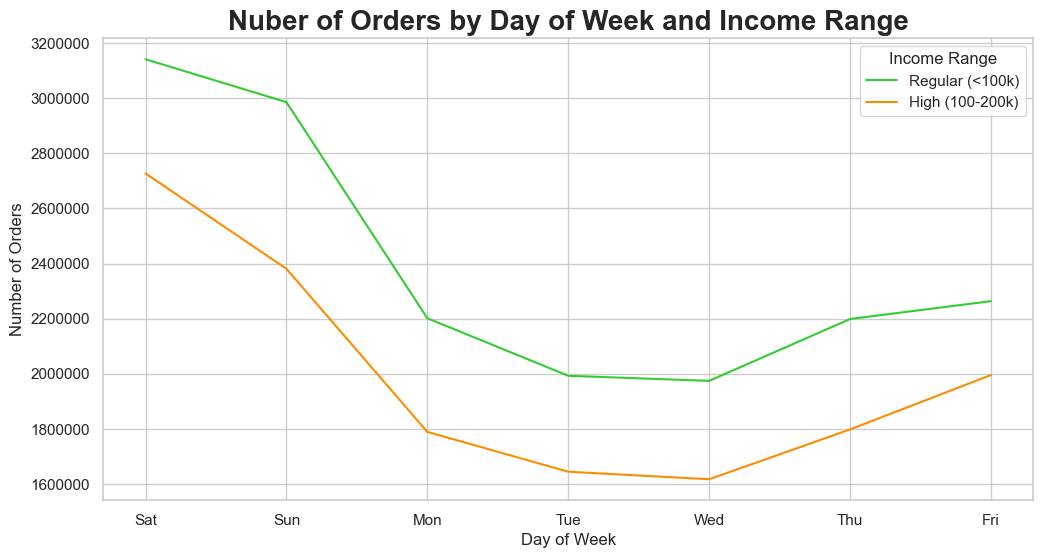

In [113]:
# create a nicer week chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = income_week, x = 'order_day_of_week', y = 'Regular income', label='Regular (<100k)', color = 'limegreen')
sns.lineplot(data = income_week, x='order_day_of_week', y='High income', label = 'High (100-200k)', color = 'darkorange')
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Nuber of Orders by Day of Week and Income Range', fontsize = 20, fontweight = 'bold')
plt.legend(title = 'Income Range')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'income_week_line.png'))

<Axes: xlabel='order_day_of_week', ylabel='Very High income'>

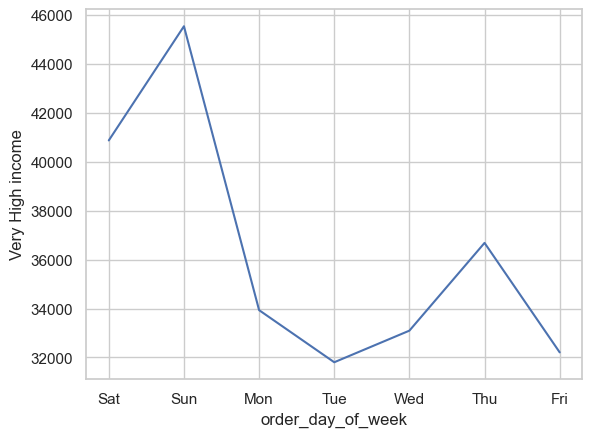

In [114]:
#quick and dirty line
sns.lineplot(data = income_week, x = income_week.index, y = 'Very High income')

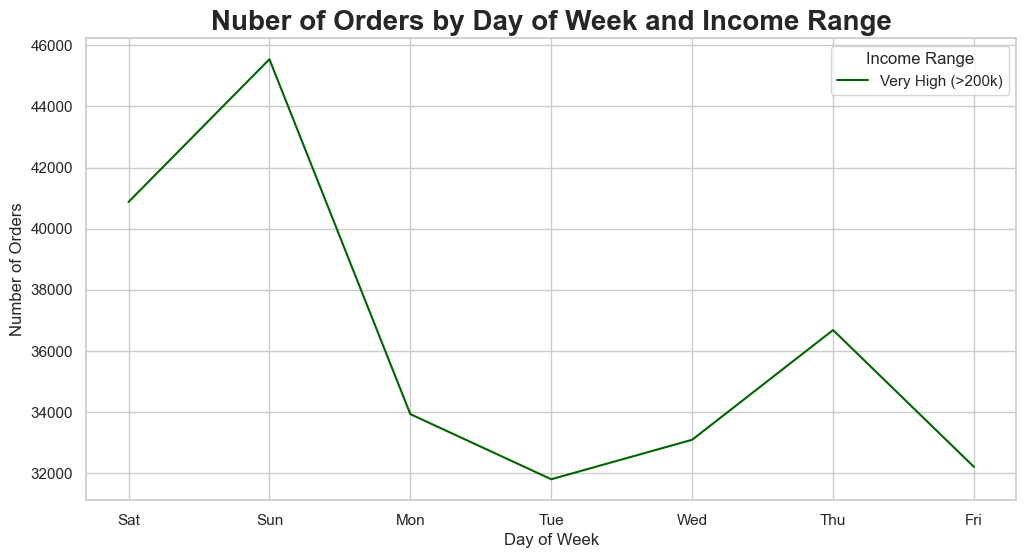

In [115]:
# create a nicer week chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = income_week, x = 'order_day_of_week', y = 'Very High income', label='Very High (>200k)', color = 'darkgreen')
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Nuber of Orders by Day of Week and Income Range', fontsize = 20, fontweight = 'bold')
plt.legend(title = 'Income Range')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'very_high_income_week_line.png'))

In [116]:
# crosstab of income range and price_range
income_price = pd.crosstab(df['price_range_loc'], df['income_range']).sort_values(by = 'High income', ascending = False)

In [117]:
#take a look
income_price = income_price[['Regular income', 'High income', 'Very High income']]

In [118]:
income_price

income_range,Regular income,High income,Very High income
price_range_loc,,,
Mid-range product,11113282,9609222,169267
Low-range product,5448229,4147728,78883
High-range product,195651,196310,5992


In [119]:
income_price.to_clipboard()

In [120]:
#assign colors
colors = ['limegreen', 'darkorange', 'darkgreen']

<Axes: xlabel='price_range_loc'>

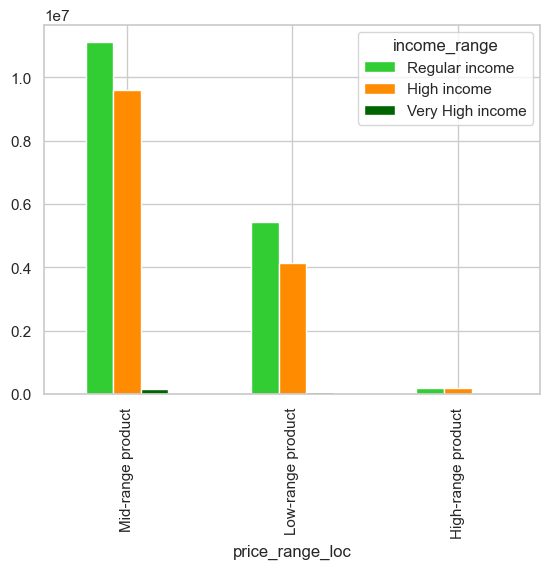

In [121]:
#quick and dirty bar
income_price.plot.bar(color = colors)

In [122]:
#have a look in excel
income_price.to_clipboard()

In [123]:
# make a crosstab of fam_status departments
fam_depts = pd.crosstab(df['department'], df['fam_status']).sort_values(by = 'married', ascending = False)

In [124]:
#check it out
fam_depts

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
produce,777094,430539,6373293,1498347
dairy eggs,442602,250207,3632599,851774
snacks,236244,131310,1944658,454194
beverages,220879,119107,1807453,424462
frozen,183957,102993,1489390,345391
pantry,151891,85845,1252956,292013
bakery,95735,53684,785749,185660
canned goods,84268,48477,712577,166752
deli,86749,48119,702333,166633


In [125]:
#rearrange columns
fam_depts = fam_depts[['married', 'single', 'divorced/widowed', 'living with parents and siblings']]

In [126]:
#send it to excel
fam_depts.to_clipboard()

In [127]:
fam_depts

fam_status,married,single,divorced/widowed,living with parents and siblings
department,,,,
produce,6373293,1498347,777094,430539
dairy eggs,3632599,851774,442602,250207
snacks,1944658,454194,236244,131310
beverages,1807453,424462,220879,119107
frozen,1489390,345391,183957,102993
pantry,1252956,292013,151891,85845
bakery,785749,185660,95735,53684
canned goods,712577,166752,84268,48477
deli,702333,166633,86749,48119


In [128]:
#crosstab of departements and day of week
depts_week = pd.crosstab(df['order_day_of_week'], df['department'])

In [129]:
depts_week = depts_week[depts_week.sum().sort_values(ascending=False).index]

In [130]:
depts_week = depts_week.rename(index = day_names)

In [131]:
#separate the top depts
top_prods_week = depts_week[['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']]

## 11.0 Top & Bottom Depts Vis

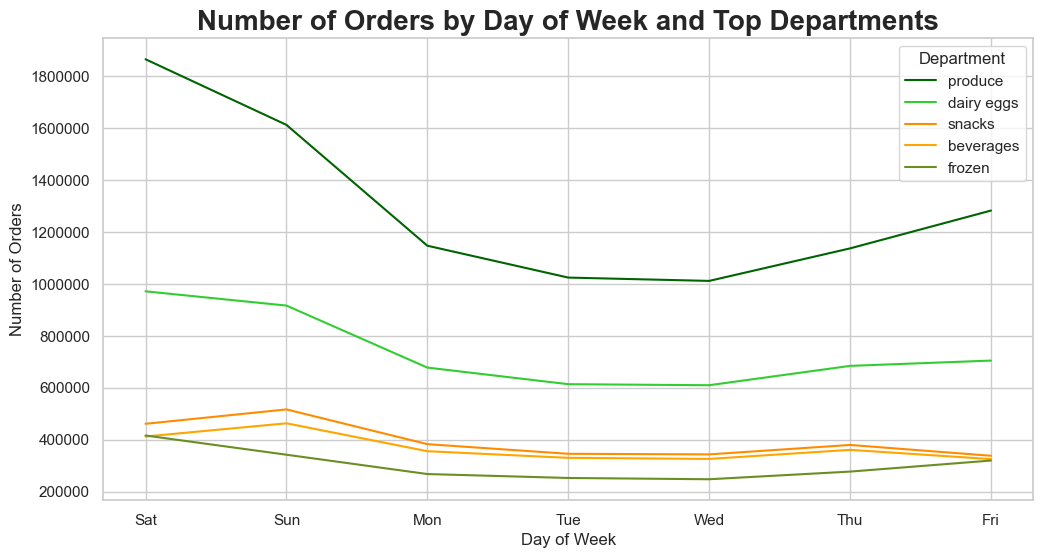

In [132]:
# create a top week chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = top_prods_week, x = 'order_day_of_week', y = 'produce', label='produce', color = 'darkgreen')
sns.lineplot(data = top_prods_week, x = 'order_day_of_week', y = 'dairy eggs', label='dairy eggs', color = 'limegreen')
sns.lineplot(data = top_prods_week, x = 'order_day_of_week', y = 'snacks', label='snacks', color = 'darkorange')
sns.lineplot(data = top_prods_week, x = 'order_day_of_week', y = 'beverages', label='beverages', color = 'orange')
sns.lineplot(data = top_prods_week, x = 'order_day_of_week', y = 'frozen', label='frozen', color = 'olivedrab')
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week and Top Departments', fontsize = 20, fontweight = 'bold')
plt.legend(title = 'Department')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'top_departments_week_line.png'))

In [133]:
#make bottom depts
bottom_depts = depts_week[['babies', 'international', 'alcohol', 'pets', 'bulk']]

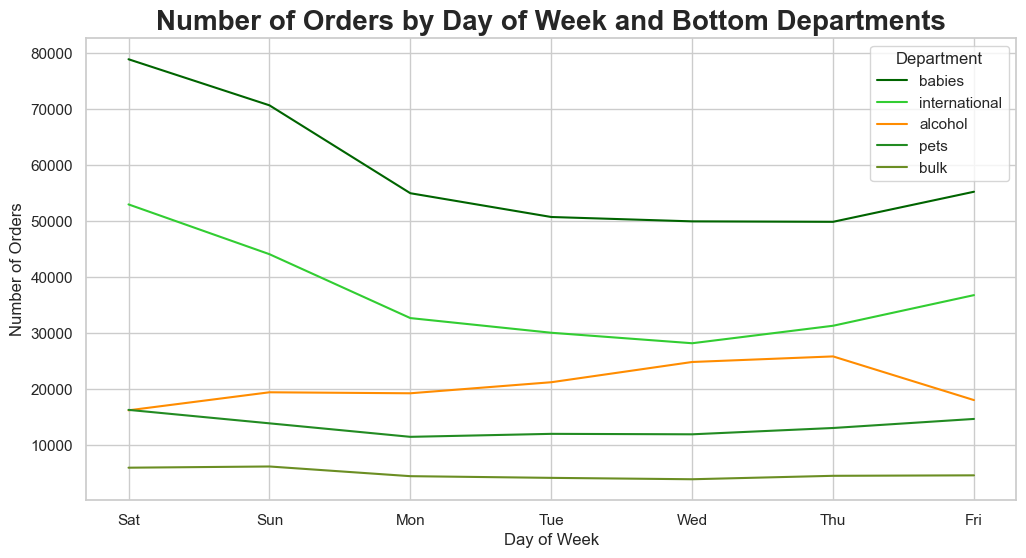

In [134]:
# create a bottom week chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = bottom_depts, x = 'order_day_of_week', y = 'babies', label='babies', color = 'darkgreen')
sns.lineplot(data = bottom_depts, x = 'order_day_of_week', y = 'international', label='international', color = 'limegreen')
sns.lineplot(data = bottom_depts, x = 'order_day_of_week', y = 'alcohol', label='alcohol', color = 'darkorange')
sns.lineplot(data = bottom_depts, x = 'order_day_of_week', y = 'pets', label='pets', color = 'forestgreen')
sns.lineplot(data = bottom_depts, x = 'order_day_of_week', y = 'bulk', label='bulk', color = 'olivedrab')
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week and Bottom Departments', fontsize = 20, fontweight = 'bold')
plt.legend(title = 'Department')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'bottom_departments_week_line.png'))

In [135]:
#create a crosstab  of fam_status and loyalty_flag
fam_loyalty = pd.crosstab(df['loyalty_flag'], df['fam_status'])

In [136]:
fam_loyalty.to_clipboard()

In [137]:
df_alcohol = df.loc[df['department'] == 'alcohol']

In [138]:
df_alcohol.shape

(144627, 36)

In [139]:
df_alcohol.to_clipboard()

In [140]:
#make a crosstab of age_fam and department
age_fam_prods = pd.crosstab(df['department'], df['age_fam']).sort_values(by = 'Middle - married', ascending = False)

In [141]:
#sort the columns
age_fam_prods = age_fam_prods[age_fam_prods.sum().sort_values(ascending = False).index]

In [142]:
#send it to excel
age_fam_prods.to_clipboard()

In [143]:
#reminder of the column names
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group', 'age_fam', 'income_range', 'dependants'],
      dtype='object')

In [144]:
df['dependants'].value_counts(dropna = False).to_clipboard()

## 12.0 Investigate Frequency

In [145]:
#make a cross tab of age_fam and frequency_flag
age_fam_freq = pd.crosstab(df['age_fam'], df['frequency_flag']).sort_values(by = 'Frequent customer', ascending = False)

In [146]:
#reorder columns
age_fam_freq = age_fam_freq[age_fam_freq.sum().sort_values(ascending = False).index]

<Axes: xlabel='age_fam'>

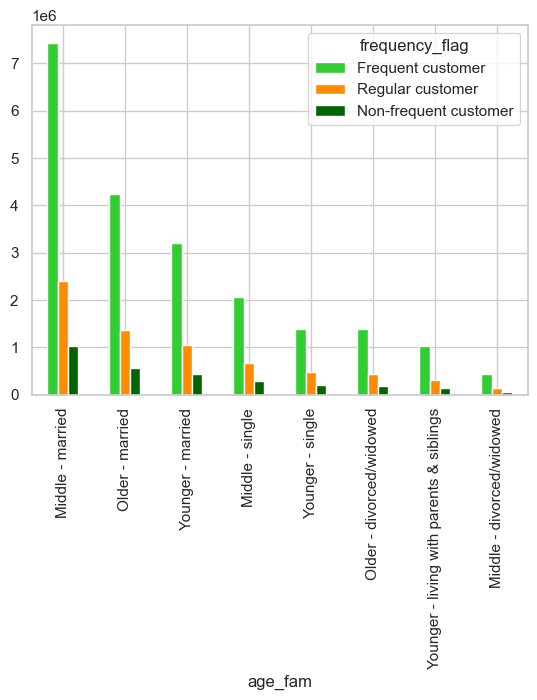

In [147]:
#quick and dirty bar
age_fam_freq.plot.bar(color = colors)

In [152]:
#make a crosstab of age and frequency
age_freq = pd.crosstab(df['frequency_flag'], df['age_group']).sort_values(by = 'middle', ascending = False)

In [154]:
#order descending
age_freq = age_freq[age_freq.sum().sort_values(ascending = False).index]

In [155]:
age_freq

age_group,middle,young,old
frequency_flag,,,
Frequent customer,9939240,5634260,5630976
Regular customer,3219246,1841431,1804436
Non-frequent customer,1368239,766604,760132


<Axes: xlabel='frequency_flag'>

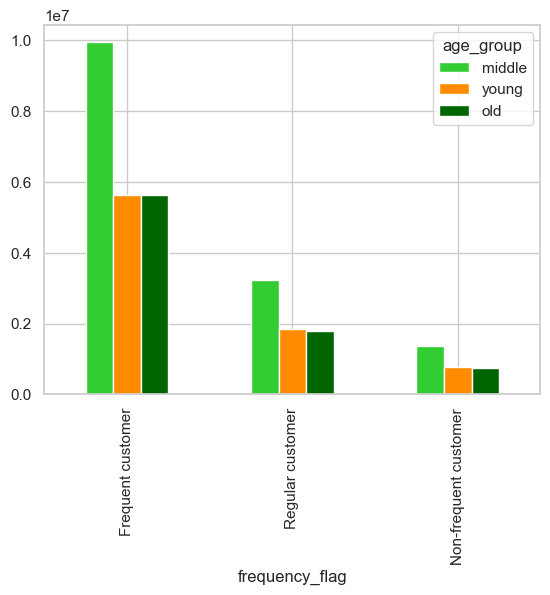

In [156]:
#quick and dirty bar
age_freq.plot.bar(color = colors)

In [151]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_dataframe.pkl'))

In [157]:
#crosstab of dependants and frequency
dependants_freq = pd.crosstab(df['frequency_flag'], df['dependants']).sort_values(by = 'yes', ascending = False)

In [161]:
#sort
dependants_freq = dependants_freq[['yes', 'no']]

<Axes: xlabel='frequency_flag'>

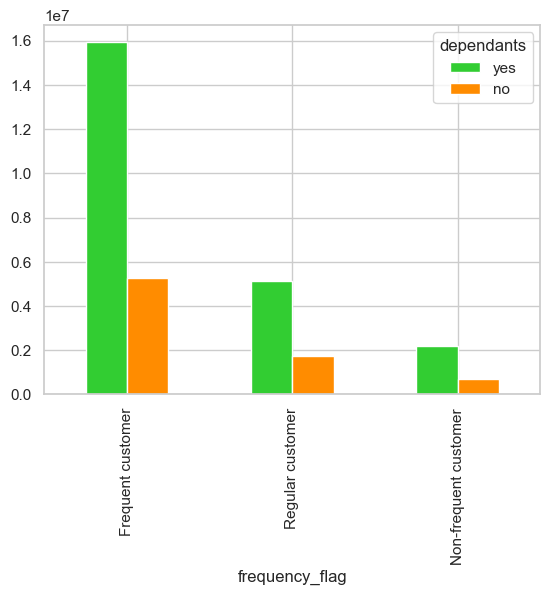

In [162]:
#quick and dirty chart
dependants_freq.plot.bar(color = colors)

In [163]:
# to excel
dependants_freq.to_clipboard()

In [164]:
#make a cross tab of fam_status and frequency_flag
fam_freq = pd.crosstab(df['fam_status'], df['frequency_flag']).sort_values(by = 'Frequent customer', ascending = False)

<Axes: xlabel='fam_status'>

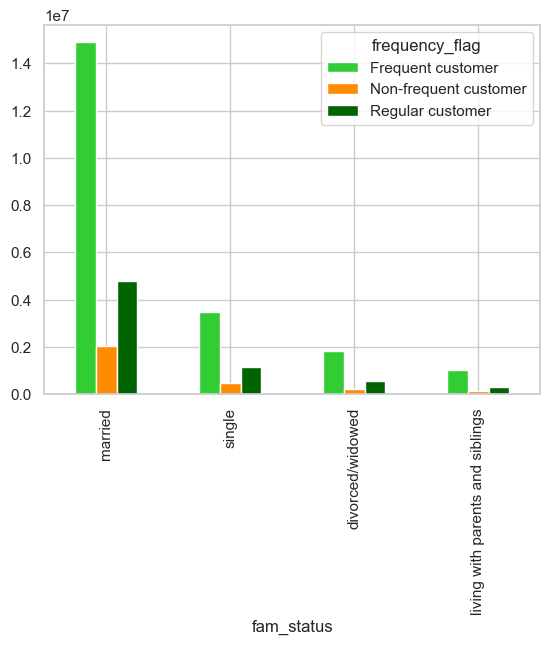

In [169]:
fam_freq.plot.bar(color = colors)